In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Aufgabe 1

Programmieren Sie die kubische Spline-Interpolation für eingespannte Splines für beliebiges n bei
äquidistanter Verteilung der Stützstellen $x_i$ . Verwenden Sie hierbei Hermite-Interpolation, lösen Sie
das auftretende lineare Gleichungssystem zur Bestimmung der Ableitungen pi an den Stellen xi mit
einer vorgefertigten Routine, z.B. numpy.linalg.solve. Testen Sie Ihr Programm an der Funktion


In [2]:
# define the function

def f(x):
    return 1/(1+4 * x**2)

# Define the boundary condition

f_prime_left  = 8 / 25
f_prime_right = -8 /25

In [3]:
def div_diff(x_v, y_v):
   n = len(x_v)
   res = np.zeros((n, n))
   res[:, 0] = y_v
   for j in range(1, n):
     for i in range(n-1, j-1, -1): 
        res[i, j] = (res[i, j-1] - res[i-1, j-1]) / (x_v[i] - x_v[i-j])
   return res

In [143]:
def qubic_spline_hermite(x_p, x_v, y_v,f_prime_start,f_prime_end):
    
    # Number of Intervals, n points --> n-1 intervals
    n = len(x_v) - 1

    # Calculate  h = x[i+1] - x[i]
    h = np.zeros(n)
    for i in range(n):
        h[i] = x_v[i+1] -  x_v[i]


    # Initialize the tridiagonal matrix

    trig_mat = np.zeros((n-1,n-1))

    # Fill the matrix with the appropiate values

    # e_i = 1/hi these are the [i,i-1] and [i-1,i]
    for i in range(0,n-1):
        trig_mat[i,i] = 2*(1/h[i-1] + 1/h[i])
        trig_mat[i,i-1] = 1/h[i] # Lower Diag
        trig_mat[i-1,i] = 1/h[i]

    # Special values i stole from wikiverse 

    
    rhs_vector = np.zeros(n-1)
    

    delta_y = div_diff(x_v,y_v)
    # Now take the special values for 1 and n-1
    rhs_vector[0] = 3 * (delta_y[1,1]/h[0] + delta_y[2,2]/h[1]) - f_prime_start/h[0]
    rhs_vector[-1]  = 3*(delta_y[n-2,n-1]/h[n-2] + delta_y[n-1,n]/h[n-1]) - f_prime_end/h[n-1]
    for i in range(1,n-1):
        rhs_vector[i] = 3*(delta_y[i+1,1]/h[i] + delta_y[i+2,1]/h[i+1])
    
    # Solve the sytem to obtain the second derivatives b
    p = np.linalg.solve(trig_mat,rhs_vector)
    p = np.pad(p,(1,1), constant_values=[f_prime_start,f_prime_start])
     
    
    # This algorithm searches the right spline for the interpolation
    for i in range(n):
        if x_p < min (x_v) or x_p > max(x_v): raise ValueError("Value outside node interval")
        elif x_v[i] <= x_p <x_v[i+1]:
            l = i
            break
        elif x_p == x_v[n]:
            l = n-1
            break
    
    
    s_i = y_v[l] + (x_p - x_v[l]) * delta_y[l+1,1] + 1/(h[l]**2)*(x_p - x_v[l])*(x_p - x_v[l+1]) * \
          ((p[l+1]- delta_y[l+1,1])*(x_p - x_v[l]) + (p[l]-delta_y[l+1,1])*(x_p-x_v[l+1]))
    return s_i
    



[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923 -3.32307692]
[ 0.35076923

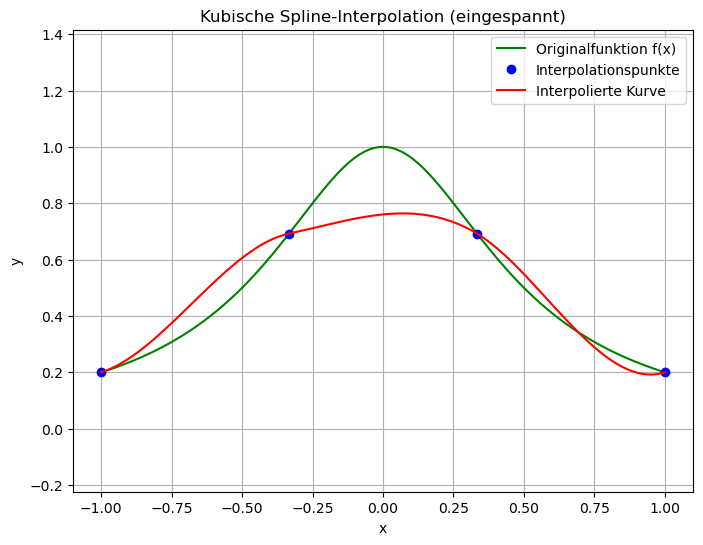

In [144]:
f_prime_start = 8/25
f_prime_end = -8/25


n = 3

# Equidistant Points
x_equi = np.linspace(-1,1,n+1)
y_equi = f(x_equi)

# Erstellen der interpolierten Kurve
x_dense = np.linspace(-1, 1, 500)

y_dense = [qubic_spline_hermite(xi, x_equi, y_equi, f_prime_start, f_prime_end) for xi in x_dense]

# Plotten der Funktion, der Interpolationspunkte und der interpolierten Kurve
plt.figure(figsize=(8, 6))
plt.plot(x_dense, f(x_dense), 'g-', label='Originalfunktion f(x)')
plt.plot(x_equi, y_equi, 'bo', label='Interpolationspunkte')
plt.plot(x_dense, y_dense, 'r-', label='Interpolierte Kurve')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Kubische Spline-Interpolation (eingespannt)')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()



# Aufgabe 2

Wir betrachten zunächst folgende sechs Eckpunkte und die Mittelpunkte der sechs Seiten eines regelmäßigen Sechsecks als Datensatz

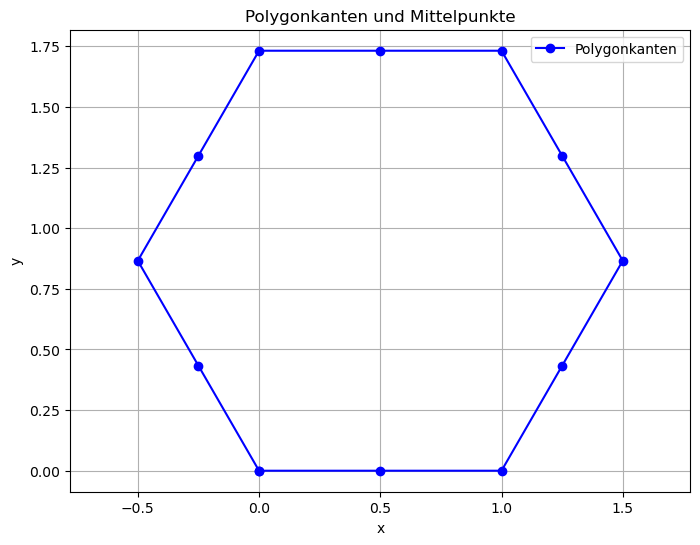

In [145]:
polygon_data = [(0,0),(0.5,0),
                (1,0),(5/4, np.sqrt(3)/4),
                (3/2, np.sqrt(3)/2),
                (5/4 ,3*np.sqrt(3)/4),
                (1, np.sqrt(3)),
                (1/2,np.sqrt(3)),(0, np.sqrt(3)),
                (-1/4,3*np.sqrt(3)/4),(-1/2, np.sqrt(3)/2),
                (-1/4, np.sqrt(3)/4), (0,0)]

edges_x, edges_y = zip(*polygon_data)

plt.figure(figsize=(8, 6))
plt.plot(edges_x, edges_y, 'bo-', label='Polygonkanten')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polygonkanten und Mittelpunkte')
plt.legend()
plt.grid(True)
plt.axis('equal')

plt.show()

Es handelt sich wie im Kapitel 3.14 um eine Parametrische Interpolation man sucht also eine Kurve

Man sucht eine Kurve in Parameterdarstellung 

$x = x(t), ~ y= y(t)$ 

In [146]:
# We first of set t equal to the length of i the points

n = len(edges_x)
t = np.arange(n)

print("Amount of Points: " ,n)
print("Äquidistance points: ", t)

Amount of Points:  13
Äquidistance points:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12]


### Polynominterpolation mit äquidistanten Stützstellen

Beginnen wir erneut mit der Implementation der Dividierenden Differenzen und dem Horner Schema

In [147]:
def divided_differences(x, y):
    n = len(y)
    coef = np.copy(y)
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            coef[i] = (coef[i] - coef[i-1]) / (x[i] - x[i-j])
    return coef

coef_x = divided_differences(t,edges_x)
coef_y = divided_differences(t,edges_y)

print(coef_x)
print(coef_y)

[ 0.00000000e+00  5.00000000e-01  0.00000000e+00 -4.16666667e-02
  2.08333333e-02 -1.04166667e-02  4.16666667e-03 -1.28968254e-03
  3.22420635e-04 -6.68264991e-05  1.15740741e-05 -1.65970218e-06
  1.88934651e-07]
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  7.21687836e-02
 -3.60843918e-02  1.08253175e-02 -2.40562612e-03  3.43660875e-04
 -1.49077799e-19 -1.78990039e-05  6.68229478e-06 -1.65972581e-06
  3.27244414e-07]


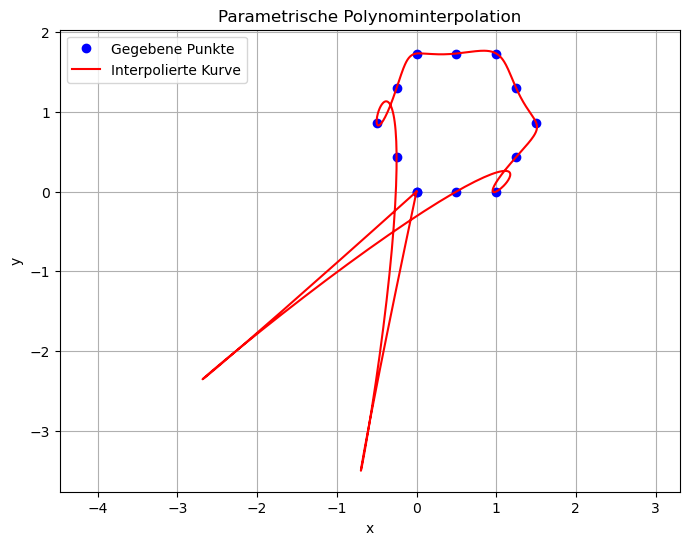

In [148]:
def horner(coef, x_data, x):
    """
    Implementation of the Horneer scheme for polynomial evaluation
    Here coeff is our dividing differences table we get,
    """
    result = coef[-1]
    for i in range(len(coef) - 2, -1, -1):
        result = result * (x - x_data[i]) + coef[i]
    return result

# Erstellen der interpolierten Kurve
t_interp = np.linspace(0, n-1, 500)
x_interp = horner(coef_x,t,t_interp)
y_interp = horner(coef_y,t,t_interp)

plt.figure(figsize=(8, 6))
plt.plot(edges_x, edges_y, 'bo', label='Gegebene Punkte')
plt.plot(x_interp, y_interp, 'r-', label='Interpolierte Kurve')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Parametrische Polynominterpolation')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

Wie auch im Skriptum beschrieben gibt diese Variante sehr schlechte ergebnise

### Chebyshev Knoten mit dividierenden Differenzen und Horner Schema

Zur Erinnerung

$x_k = \cos (\frac{2k + 1}{2n} \pi)$ , $k = 0,...,n-1$

In [149]:
def chebyshev_nodes(n):
    return np.array([np.cos((2 * j + 1) / (2 * n + 2) * np.pi) for j in range(n + 1)])

n = len(edges_x)-1

t = chebyshev_nodes(n)
t = (t+1)/2*n

In [150]:
coef_x = divided_differences(t,edges_x)
coef_y = divided_differences(t,edges_y)
print(coef_x)
print(coef_y)

[ 0.00000000e+00 -1.44443634e+00 -6.87979293e-01 -1.98122775e-01
 -3.20412499e-02  2.58712341e-05  1.43710641e-03  4.36343811e-04
  8.53741546e-05  1.32314517e-05  1.75526967e-06  1.96602525e-07
  1.09870017e-08]
[ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -1.39938043e-01
 -7.96945134e-02 -2.39517486e-02 -4.90145185e-03 -7.51817325e-04
 -9.03223420e-05 -8.36628139e-06 -4.63274456e-07  3.76218373e-08
  1.90300452e-08]


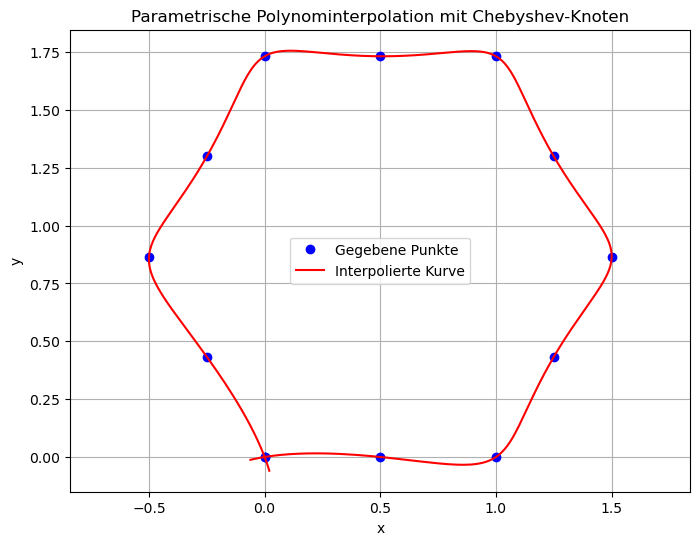

In [151]:
t_interp = np.linspace(0, n, 500)
x_interp = horner(coef_x,t,t_interp)
y_interp = horner(coef_y,t,t_interp)

plt.figure(figsize=(8, 6))
plt.plot(edges_x, edges_y, 'bo', label='Gegebene Punkte')
plt.plot(x_interp, y_interp, 'r-', label='Interpolierte Kurve')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Parametrische Polynominterpolation mit Chebyshev-Knoten')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

Ergebnis schon besser, die Ecken etwas abgerunden und die Lininien sind halt kurvig

### Spline Interpolation mit periodischen Kubischen Spline mit äquidistanten Stützstellen $t_i = i$


Die Dokumentation zu scipy.interpolate.CubicSpline

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html

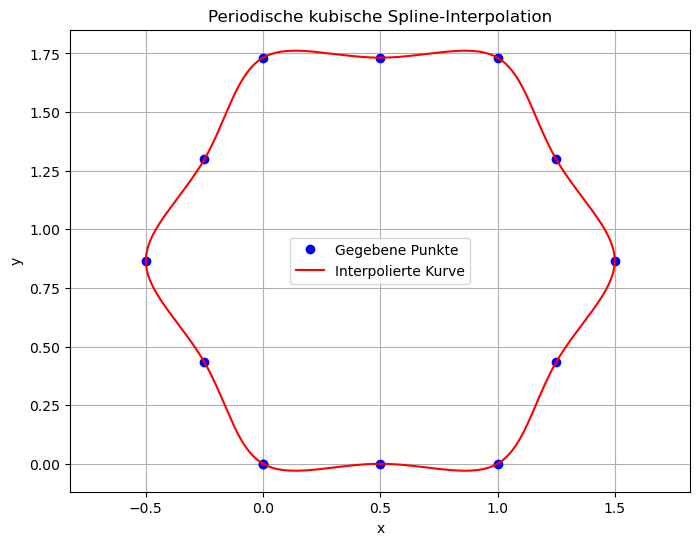

In [152]:
from scipy.interpolate import CubicSpline

n = len(edges_x)
t = np.arange(n)

cs_x = CubicSpline(t, edges_x, bc_type="periodic")
cs_y = CubicSpline(t,edges_y,bc_type="periodic")


t_interp = np.linspace(0, n-1, 500)
x_interp = cs_x(t_interp)
y_interp = cs_y(t_interp)


plt.figure(figsize=(8, 6))
plt.plot(edges_x, edges_y, 'bo', label='Gegebene Punkte')
plt.plot(x_interp, y_interp, 'r-', label='Interpolierte Kurve')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Periodische kubische Spline-Interpolation')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

Ziemlich ähnlich wie die Chebyschev + Horner Variante
